In [1]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
# read the csv file from local storage
data = pd.read_csv('C:/Users/DELL/Desktop/Python/Kaggle/Dataset/alzheimers_prediction_dataset.csv')
data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
rows,cols = data.shape
print("Rows :",rows)
print("Columns:",cols)

Rows : 74283
Columns: 25


In [5]:
data.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [ ]:
# describe the numeric columns in the dataset
data.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [69]:
# check the null values
null_values = data.isnull().sum()
null_values

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [70]:
# check the duplication occured
duplicated_rows = data.duplicated().sum()
duplicated_rows

np.int64(0)

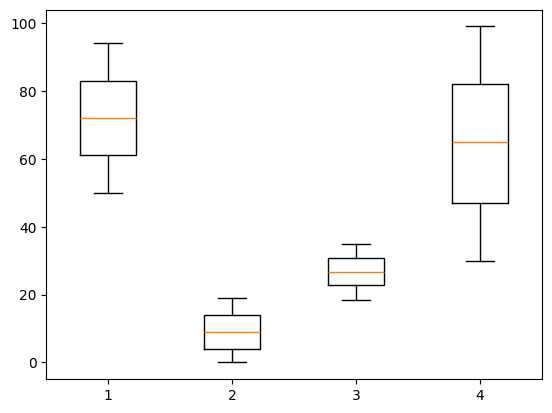

In [71]:
# draw the ploxplots to identify outliers
plt.boxplot(data[['Age','Education Level','BMI','Cognitive Test Score']])
plt.Figure(figsize=(8,6))
plt.show()

In [72]:
# map the categorical data into numerical form (Yes -> 1, No -> 0)
column_to_convert = ['Gender','Diabetes','Hypertension',"Family History of Alzheimer’s","Genetic Risk Factor (APOE-ε4 allele)","Alzheimer’s Diagnosis"]
data[column_to_convert] = data[column_to_convert].map(lambda x: 1 if x == 'Yes' else 0)

In [73]:
data.value_counts()

Country    Age  Gender  Education Level  BMI   Physical Activity Level  Smoking Status  Alcohol Consumption  Diabetes  Hypertension  Cholesterol Level  Family History of Alzheimer’s  Cognitive Test Score  Depression Level  Sleep Quality  Dietary Habits  Air Pollution Exposure  Employment Status  Marital Status  Genetic Risk Factor (APOE-ε4 allele)  Social Engagement Level  Income Level  Stress Levels  Urban vs Rural Living  Alzheimer’s Diagnosis
USA        94   0       19               34.6  Low                      Current         Regularly            0         0             High               0                              82                    High              Average        Average         High                    Retired            Widowed         0                                     Medium                   Low           Low            Rural                  1                        1
Argentina  50   0       0                19.9  High                     Former          Regular

In [74]:
# map the categorical data into numerical form (Low -> 0, Medium -> 1, High -> 2)
columns_with_LMH=['Physical Activity Level','Depression Level','Air Pollution Exposure','Social Engagement Level','Income Level','Stress Levels']
data[columns_with_LMH] = data[columns_with_LMH].map(lambda x: 0 if x == 'Low' else (1 if x == 'Medium' else 2))

# map the categorical data into numerical form (Normal -> 0, High -> 1)
data['Cholesterol Level'] = data['Cholesterol Level'].map({'High':1,'Normal':0})
data['Urban vs Rural Living'] = data['Urban vs Rural Living'].map({'Urban':1,'Rural':0})

In [75]:
data

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,0,1,33.0,1,Never,Occasionally,0,0,...,Healthy,2,Retired,Single,0,0,1,2,1,0
1,Argentina,72,0,7,29.9,1,Former,Never,0,0,...,Healthy,1,Unemployed,Widowed,0,2,0,2,1,0
2,South Africa,86,0,19,22.9,2,Current,Occasionally,0,1,...,Average,1,Employed,Single,0,0,1,2,0,0
3,China,53,0,17,31.2,0,Never,Regularly,1,0,...,Healthy,1,Retired,Single,0,2,1,0,0,0
4,Sweden,58,0,3,30.0,2,Former,Never,1,0,...,Unhealthy,2,Employed,Married,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,Former,Never,0,0,...,Average,2,Unemployed,Widowed,0,1,2,1,0,0
74279,UK,58,0,18,30.6,0,Never,Occasionally,1,0,...,Average,1,Unemployed,Single,0,1,2,2,0,0
74280,Spain,57,0,13,28.2,1,Never,Regularly,0,0,...,Healthy,0,Employed,Single,1,2,0,0,0,0
74281,Brazil,73,0,7,29.0,0,Never,Regularly,0,0,...,Healthy,0,Employed,Widowed,0,0,0,2,0,0


In [76]:
# Convert categorical data into binary representation columns (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False, drop='first')
columns_to_encode = ['Country','Smoking Status','Alcohol Consumption','Sleep Quality','Dietary Habits','Employment Status','Marital Status']
encoded_columns = encoder.fit_transform(data[columns_to_encode])
encoded_data = pd.DataFrame(encoded_columns,columns=encoder.get_feature_names_out(columns_to_encode))

data = pd.concat([data,encoded_data], axis =1)
data.drop(columns=columns_to_encode, inplace=True)

In [77]:
data.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Sleep Quality_Good,Sleep Quality_Poor,Dietary Habits_Healthy,Dietary Habits_Unhealthy,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Single,Marital Status_Widowed
0,90,0,1,33.0,1,0,0,0,0,90,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,72,0,7,29.9,1,0,0,0,0,65,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,86,0,19,22.9,2,0,1,0,0,43,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,0,17,31.2,0,1,0,0,0,81,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,58,0,3,30.0,2,1,0,0,0,49,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
# check whether there is class imbalance
value_count = data['Alzheimer’s Diagnosis'].value_counts()
value_count

Alzheimer’s Diagnosis
0    43570
1    30713
Name: count, dtype: int64

In [79]:
# divide dataset into features and target
X= data.drop('Alzheimer’s Diagnosis', axis=1)
y= data['Alzheimer’s Diagnosis']

In [80]:
# address the class imbalance using SMOTE 
smote  = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [81]:
# split the dataset into traning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [82]:
print('Training set:', X_train.shape[0])
print('Testing set:', X_test.shape[0])

Training set: 69712
Testing set: 17428


In [83]:
# standardize features in both traning and testing set
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# build the neural network architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled,y_train, epochs=100, batch_size=32)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6747 - loss: 0.5987
Epoch 2/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7226 - loss: 0.5489
Epoch 3/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7286 - loss: 0.5391
Epoch 4/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7292 - loss: 0.5315
Epoch 5/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7343 - loss: 0.5266
Epoch 6/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7380 - loss: 0.5194
Epoch 7/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7462 - loss: 0.5073
Epoch 8/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7451 - loss: 0.5037
Epoch 9/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7423 - loss: 0.5024
Epoch 10/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7477 - loss: 0.4960
Epoch 11/100
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7521 - loss: 0.4896
Epoch 12/100
2179/2

In [86]:
# predict using testing set
y_prob = model.predict(X_test_scaled) 

y_pred = (y_prob > 0.5)
#create the classification report for NN
cl_report = classification_report(y_test,y_pred)
print(cl_report)

545/545 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      8690
           1       0.74      0.73      0.74      8738

    accuracy                           0.74     17428
   macro avg       0.74      0.74      0.74     17428
weighted avg       0.74      0.74      0.74     17428



<Axes: >

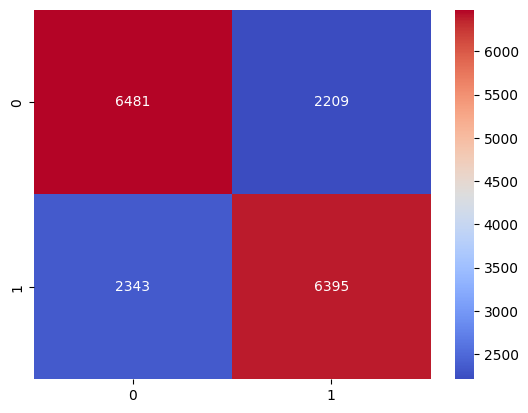

In [87]:
# create the confusion metrics for NN
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')

In [88]:
# perform XGB
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), eval_metric='logloss')

xgb_model.fit(X_train, y_train)

# create the classification report for XGB
y_pred_xgb = xgb_model.predict(X_test)
cl_report_xgb = classification_report(y_test, y_pred_xgb)
print(cl_report_xgb)

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      8690
           1       0.76      0.75      0.76      8738

    accuracy                           0.76     17428
   macro avg       0.76      0.76      0.76     17428
weighted avg       0.76      0.76      0.76     17428



<Axes: >

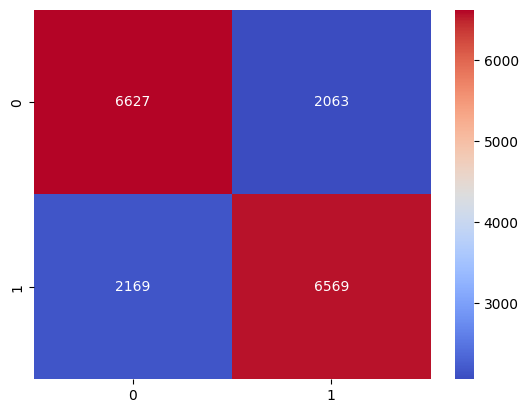

In [89]:
# create the confusion metrics for XGB
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')